In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [2]:
# papers
# Given data
years1 = [
    2005, 2005, 2008, 2011, 2011, 2012, 2013, 2013, 2014, 2014,
    2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017,
    2017, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2019,
    2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020, 2020, 2021,
    2021, 2021, 2021, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
    2022, 2022, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
    2023, 2023, 2023, 2023, 2012, 2013, 2020, 2020, 2022
]

years2 = [
    2010, 2012, 2013, 2014, 2015, 2017, 2017, 2017, 2017, 2018,
    2018, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2021, 2021,
    2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2022, 2022,
    2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023, 2023, 2023,
    2023
]

years = years1 + years2

In [4]:
len(years1), len(years2), len(years)

(69, 41, 110)

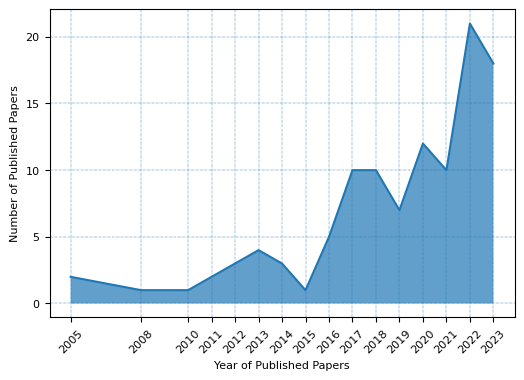

In [6]:
# Count occurrences of each year
year_counts = Counter(years)

# Separate years and counts for plotting
years_unique = sorted(year_counts.keys())
counts = [year_counts[year] for year in years_unique]


# Plotting
plt.figure(figsize=(6, 4))

plt.plot(years_unique,counts)

# plt.step(years_unique, counts, where='mid', color='skyblue', linewidth=2)
plt.fill_between(years_unique, counts, alpha=0.7)

plt.xlabel("Year of Published Papers", fontsize=8)
plt.ylabel("Number of Published Papers", fontsize=8)
plt.xticks(years_unique, rotation=45, fontsize=8)
plt.yticks(np.arange(0, max(counts)+1, 5), fontsize=8)
plt.grid(color='C0', which='both', linestyle='-.', linewidth=0.3)

# Save the plot
plt.savefig('/home/ravi/Desktop/YearVsPapers110.png', dpi=200, bbox_inches='tight')

plt.show()

# Word Cloud

In [5]:
# word cloud
import nltk
# importing all necessary modules
from wordcloud import WordCloud #, STOPWORDS
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk_stopwords = set(stopwords.words("english"))
nltk_stopwords.update(["arxiv", "jstor"])
# nltk_stopwords.update(["said", "now", "like", "also", "would", "year", "new", "one"])

def get_wordcloud(df):
    comment_words = ''
#     stopwords = set(STOPWORDS)
    stopwords = set(nltk_stopwords)

    # iterate through the csv file
    for val in df.articles:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(background_color ='white',
                    stopwords = stopwords,
                    collocations=False,
                    min_font_size = 10).generate(comment_words)
    
    return wordcloud

[nltk_data] Downloading package stopwords to /home/ravi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# plot the WordCloud image         
dbDF = pd.read_csv("extreme_25.csv")
dbDF.articles = dbDF['titles/title']
# print(textALL) 

/tmp/ipykernel_2190396/531974366.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dbDF.articles = dbDF['titles/title']


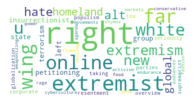

In [38]:
lib_wordcloud = get_wordcloud(dbDF)

plt.figure(figsize = (2.5, 1.5), facecolor = None)
plt.imshow(lib_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('./figs/export_25_extreme.png', dpi=200, bbox_inches='tight')
plt.show()